In [15]:
from matplotlib import pyplot as plt
from scipy.signal import deconvolve
import numpy as np

dir = '/home/kaklik/data_hroch/cosmic/Experiments/2019/08_03_car_Borkovice/'
sig = np.loadtxt(dir + 'loop_antenna/Newfile4.csv', skiprows=2, delimiter=',', usecols=[1])
t = np.arange(len(sig))*1e-6-7e-1

plt.figure(figsize=(20,10))
plt.plot(t, sig)
plt.show()


OSError: /home/kaklik/data_hroch/cosmic/Experiments/2019/08_03_car_Borkovice/loop_antenna/Newfile4.csv not found.

In [16]:
_i = np.arange(256)
_impresp = np.cos(_i*0.555)*np.exp(-_i*0.01)
_impresp_img = np.real(np.fft.ifft(1.0/np.fft.fft(_impresp)))

In [17]:
s = np.random.random(128*1024)

In [18]:
%timeit np.convolve(s[:8*1024], _impresp_img, mode='valid')
%timeit deconvolve(s[:8*1024], _impresp_img)

894 µs ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
59.4 ms ± 80.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit np.convolve(s[:16*1024], _impresp_img, mode='valid')
%timeit deconvolve(s[:16*1024], _impresp_img)

1.71 ms ± 4.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
270 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


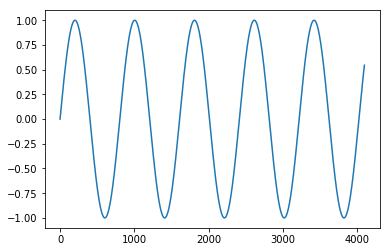

In [23]:
k = np.sin(np.arange(4096)/128)
plt.plot(k)

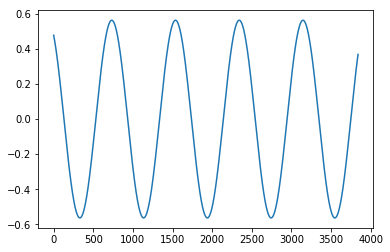

In [25]:
k_ = np.convolve(k, _impresp, mode='valid')
plt.plot(k_)

In [34]:
q1, _ = deconvolve(k_, _impresp)
q2 = np.convolve(k_, np.flip(_impresp_img), mode='valid')

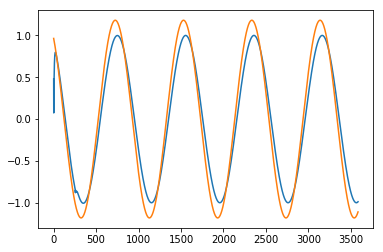

In [35]:
plt.plot(q1)
plt.plot(q2)